In [1]:
#-----------------------------------------------------IMPORT LIBRARIES---------------------------------------------------------------------------------------
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from matplotlib import pyplot as plt 
from sklearn import preprocessing
from tensorflow.keras.models import Sequential

#--------------------------------------------------------DATASETS--------------------------------------------------------------------------------------------
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/AI_FINAL/Train',target_size=(150,150), batch_size=32, class_mode='categorical')
testing_set=test_datagen.flow_from_directory('/content/drive/MyDrive/AI_FINAL/Test',target_size=(150,150), batch_size=32, class_mode='categorical')

training_set.class_indices
testing_set.class_indices

#-------------------------------------------------------CREATE MODEL-----------------------------------------------------------------------------------------
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(2,activation='softmax'))
model.summary()

#-------------------------------------------------------COMPILE MODEL-----------------------------------------------------------------------------------------
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(training_set,epochs=35,batch_size=128,verbose=1,validation_data=testing_set)

#-----------------------------------------------------EVALUATE ACCURACY---------------------------------------------------------------------------------------
Score=model.evaluate(training_set,verbose=0)
print('Loss', Score[0])
print('Accuracy', Score[1])

#--------------------------------------------------------SAVE MODEL-------------------------------------------------------------------------------------------
model.save("/content/drive/MyDrive/AI_FINAL/MaskDetection.h5")


Found 406 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


13/13 [==============================] - 46s 3s/step - loss: 1.3009 - accuracy: 0.7069 - val_loss: 0.3765 - val_accuracy: 0.8667
Epoch 2/35
13/13 [==============================] - 9s 672ms/step - loss: 0.2976 - accuracy: 0.8744 - val_loss: 0.1980 - val_accuracy: 1.0000
Epoch 3/35
13/13 [==============================] - 10s 767ms/step - loss: 0.2304 - accuracy: 0.9187 - val_loss: 0.1615 - val_accuracy: 0.9667
Epoch 4/35
13/13 [==============================] - 10s 777ms/step - loss: 0.2075 - accuracy: 0.9113 - val_loss: 0.1297 - val_accuracy: 0.9667
Epoch 5/35
13/13 [==============================] - 9s 713ms/step - loss: 0.2131 - accuracy: 0.9286 - val_loss: 0.1423 - val_accuracy: 0.9333
Epoch 6/35
13/13 [==============================] - 9s 724ms/step - loss: 0.1476 - accuracy: 0.9507 - val_loss: 0.1797 - val_accuracy: 0.9000
Epoch 7/35
13/13 [==============================] - 10s 792ms/step - loss: 0.1075 - accuracy: 0.9655 - val_loss: 0.1019 - val_accuracy: 0.9333
Epoch 8/35
13/13

<function matplotlib.pyplot.show(close=None, block=None)>

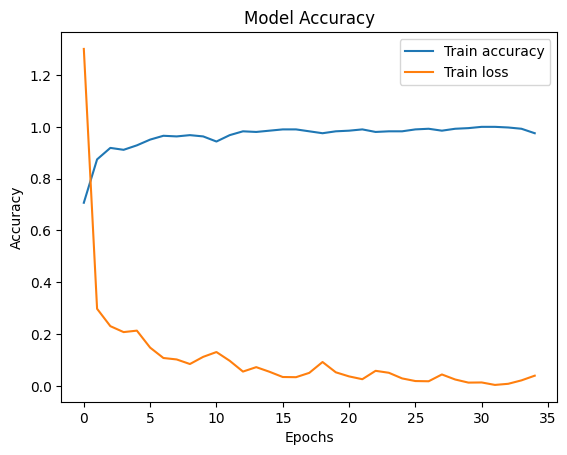

In [2]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train accuracy','Train loss'])
plt.show